# Practica 5: Regresión Parte 3


Vamos a probar dos modelos avanzados de regresion: Redes Neuronales y Bosques Aleatorios. Para esto usaremos los datos housing. Estos datos incluyen información sobre precio de la vivienda un determinado distrito de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Hay que tener en cuenta que los datos no están depurados, por lo que se requieren algunos pasos de preprocesamiento. Las caracteristicas incluidas son:

* longitude
* latitude
* housing_median_age
* total_rooms
* total_bedrooms
* population
* households
* median_income
* median_house_value
* ocean_proximity

## Lectura de datos y pre-procesamiento



In [1]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Leer archivo housing.csv
df = pd.read_csv('housing.csv')

In [3]:
#Revisión de los datos
#Cabecera
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
#Información
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
#Eliminar muestras con valores perdidos
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [6]:
#Conversión de variables categoricas
df = pd.get_dummies(df, columns=['ocean_proximity'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20433 non-null  float64
 1   latitude                    20433 non-null  float64
 2   housing_median_age          20433 non-null  float64
 3   total_rooms                 20433 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20433 non-null  float64
 6   households                  20433 non-null  float64
 7   median_income               20433 non-null  float64
 8   median_house_value          20433 non-null  float64
 9   ocean_proximity_<1H OCEAN   20433 non-null  bool   
 10  ocean_proximity_INLAND      20433 non-null  bool   
 11  ocean_proximity_ISLAND      20433 non-null  bool   
 12  ocean_proximity_NEAR BAY    20433 non-null  bool   
 13  ocean_proximity_NEAR OCEAN  20433 no

##  División de los datos para entrenamiento

Nuestra variable objetivo es el valor de la vivienda ('median_house_value').

In [7]:
#Separamos entradas (X) y salidas (y)
y = df['median_house_value'].values
X = df.drop('median_house_value', axis=1).values
print(X.shape, y.shape)

(20433, 13) (20433,)


In [8]:
# Dividimos los datos
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14303, 13) (6130, 13) (14303,) (6130,)


Vamos a normalizar los datos. Para ello utilizaremos el metodo min_max_scaler

In [9]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)


---
##Random Forest para Regresión




In [10]:
# Importacion de librerias
from sklearn.ensemble import RandomForestRegressor

In [17]:
#Instancia del regresor
RF = RandomForestRegressor(n_estimators=100,max_depth=10)

In [18]:
#Entrenamos
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=10)

In [19]:
#Predecimos
y_pred_rf=RF.predict(X_test)

Text(0, 0.5, 'Predicted Y')

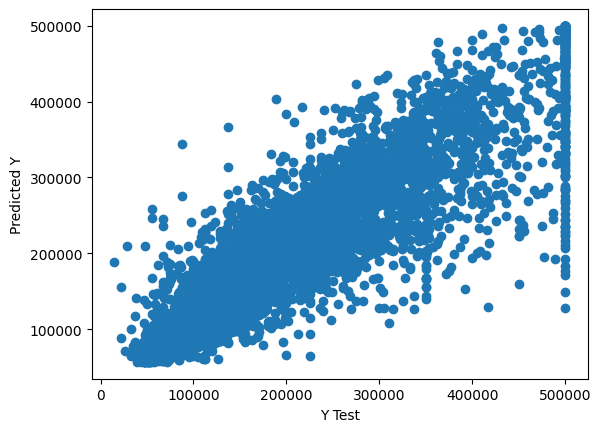

In [20]:
plt.scatter(y_test,y_pred_rf)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [21]:
# calcule estas metricas
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf)))
print('R2_score:', metrics.r2_score(y_test, y_pred_rf))

MAE: 36110.562855084914
MSE: 2854247552.518087
RMSE: 53425.15842295731
R2_score: 0.7818041492254146


Podemos mejorar aun el modelo?

In [22]:
#Uso de GridSearch
from sklearn.model_selection import GridSearchCV
parad_grid = {'n_estimators': [50,100,150,200],
              'max_depth': [5,10]}
RFModel = GridSearchCV(RandomForestRegressor(), parad_grid)
RFModel.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10],
                         'n_estimators': [50, 100, 150, 200]})

In [23]:
#Parametros seleccionados
RFModel.best_params_

{'max_depth': 10, 'n_estimators': 200}

In [24]:
#Predecimos
RFbestModel = RFModel.best_estimator_ #Sacando el mejor modelo
y_pred_rf_b=RFbestModel.predict(X_test) #Usando en los datos de muestra

In [25]:
#Metricas de desempeño
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf_b))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf_b))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf_b)))
print('R2_score:', metrics.r2_score(y_test, y_pred_rf_b))


MAE: 36149.96982249958
MSE: 2854000383.957083
RMSE: 53422.84515033885
R2_score: 0.7818230442768986
